In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [11]:
df = pd.read_csv('MTA_SPRING2017.csv') ##load data and create dataframe

In [15]:
df2 = df[np.abs(df.ENTRIES-df.ENTRIES.mean())<=(3*df.ENTRIES.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [16]:
df2.sort('ENTRIES', ascending=False).head(15)

/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,CUM_ENTRIES,CUM_EXITS,ENTRIES,EXITS
2909149,2909150,R238,R046,00-00-02,GRD CNTRL-42 ST,4567S,IRT,2017-03-17 16:00:00,16:00:00,REGULAR,4499664,1074366,4497872.0,1074366.0
2909289,2909290,R238,R046,00-03-01,GRD CNTRL-42 ST,4567S,IRT,2017-03-14 16:00:00,16:00:00,REGULAR,17882894,6944794,3932937.0,0.0
2364295,2364296,TRAM1,R468,00-00-00,RIT-MANHATTAN,R,RIT,2017-04-03 13:00:00,13:00:00,REGULAR,3609662,50876,3070827.0,40390.0
115081,115082,PTH12,R542,00-00-00,TWENTY THIRD ST,1,PTH,2017-05-24 10:24:01,10:24:01,REGULAR,1770980,161401,1663405.0,157641.0
2875770,2875771,PTH17,R541,01-00-00,THIRTY THIRD ST,1,PTH,2017-03-12 14:24:57,14:24:57,REGULAR,945818,663444,945815.0,246287.0
2875768,2875769,PTH17,R541,01-00-00,THIRTY THIRD ST,1,PTH,2017-03-12 10:12:57,10:12:57,REGULAR,945687,663420,945684.0,246263.0
1689186,1689187,PTH18,R549,01-00-00,NEWARK BM BW,1,PTH,2017-04-25 09:48:48,09:48:48,REGULAR,897709,33330,868043.0,17912.0
2404314,2404315,K025,R404,00-00-02,FRESH POND RD,M,BMT,2017-03-27 13:00:00,13:00:00,REGULAR,3473415,11,856900.0,0.0
113750,113751,PTH07,R550,00-01-00,CITY / BUS,1,PTH,2017-05-26 08:47:27,08:47:27,REGULAR,619164,260709,619119.0,260706.0
5489,5490,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,2017-05-25 17:00:00,17:00:00,REGULAR,589824,0,587903.0,0.0


In [17]:
df2['CUMULATIVE'] = df2['ENTRIES'] + df2['EXITS'] ##find cumulative traffick by adding entries and exits
df2.head()

/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,CUM_ENTRIES,CUM_EXITS,ENTRIES,EXITS,CUMULATIVE
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-05-20 00:00:00,00:00:00,REGULAR,6184841,2095161,226.0,31.0,257.0
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-05-20 04:00:00,04:00:00,REGULAR,6184865,2095167,24.0,6.0,30.0
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-05-20 08:00:00,08:00:00,REGULAR,6184891,2095192,26.0,25.0,51.0
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-05-20 12:00:00,12:00:00,REGULAR,6184973,2095275,82.0,83.0,165.0
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-05-20 16:00:00,16:00:00,REGULAR,6185217,2095326,244.0,51.0,295.0


In [21]:
df_sums = df2.groupby('STATION').sum() ## Create a new column for 'Station' in order to 
df_sums['STATION'] = df_sums.index
df_sums.head(10)

,id,CUM_ENTRIES,CUM_EXITS,ENTRIES,EXITS,CUMULATIVE,STATION
STATION,,,,,,,
1 AV,11413779643,1010130933181,1047992732952,1844729.0,1929397.0,3774126.0,1 AV
103 ST,18164520320,104387612130,427203083504,2604670.0,1733839.0,4338509.0,103 ST
103 ST-CORONA,11271300180,49943773171,46685420491,1663233.0,1211232.0,2874465.0,103 ST-CORONA
104 ST,10257569058,3329838888373,2415050644888,251921.0,81847.0,333768.0,104 ST
110 ST,7544837028,22083962304,21895957055,993151.0,764585.0,1757736.0,110 ST
111 ST,19224368402,92215488639,47699092883,1394955.0,850024.0,2244979.0,111 ST
116 ST,26837050149,1231364850330,1489506406594,2922444.0,1432832.0,4355276.0,116 ST
116 ST-COLUMBIA,7314694650,866664661420,184580448486,1204292.0,618965.0,1823257.0,116 ST-COLUMBIA
121 ST,4846753598,15556540349,4333559583,76498.0,19077.0,95575.0,121 ST


In [23]:
df_sums.sort('ENTRIES', ascending=False).head(15)

/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,CUM_ENTRIES,CUM_EXITS,ENTRIES,EXITS,CUMULATIVE,STATION
STATION,,,,,,,
GRD CNTRL-42 ST,77135670646,2130774156603,853776531547,19838942.0,2.778264e+07,4.762158e+07,GRD CNTRL-42 ST
34 ST-PENN STA,117333751700,2142632499942,1227960450194,13206631.0,1.120768e+07,2.441432e+07,34 ST-PENN STA
23 ST,83862004053,4731551593795,4533731648199,9641373.0,1.366238e+09,1.375879e+09,23 ST
34 ST-HERALD SQ,63126771932,3185634940966,3717952044342,9436266.0,8.911211e+06,1.834748e+07,34 ST-HERALD SQ
14 ST-UNION SQ,44378784622,787646564403,220884701399,9317235.0,7.395046e+06,1.671228e+07,14 ST-UNION SQ
TIMES SQ-42 ST,60043827323,4132915650502,3235702253687,7945443.0,7.396621e+06,1.534206e+07,TIMES SQ-42 ST
42 ST-PORT AUTH,59234914941,5505993123070,4527344020517,7487465.0,6.078266e+06,1.356573e+07,42 ST-PORT AUTH
FULTON ST,113383653451,2948573145263,3035521562692,7190598.0,5.832166e+06,1.302276e+07,FULTON ST
86 ST,62337644314,1695811886745,1815097703466,7116874.0,5.846819e+06,1.296369e+07,86 ST


In [24]:
df_sum_top = df_sums.sort('ENTRIES', ascending=False).head(15) ##Create a new dataframe storing most popular stations 
df_sum_top

/Users/hector/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,CUM_ENTRIES,CUM_EXITS,ENTRIES,EXITS,CUMULATIVE,STATION
STATION,,,,,,,
GRD CNTRL-42 ST,77135670646,2130774156603,853776531547,19838942.0,2.778264e+07,4.762158e+07,GRD CNTRL-42 ST
34 ST-PENN STA,117333751700,2142632499942,1227960450194,13206631.0,1.120768e+07,2.441432e+07,34 ST-PENN STA
23 ST,83862004053,4731551593795,4533731648199,9641373.0,1.366238e+09,1.375879e+09,23 ST
34 ST-HERALD SQ,63126771932,3185634940966,3717952044342,9436266.0,8.911211e+06,1.834748e+07,34 ST-HERALD SQ
14 ST-UNION SQ,44378784622,787646564403,220884701399,9317235.0,7.395046e+06,1.671228e+07,14 ST-UNION SQ
TIMES SQ-42 ST,60043827323,4132915650502,3235702253687,7945443.0,7.396621e+06,1.534206e+07,TIMES SQ-42 ST
42 ST-PORT AUTH,59234914941,5505993123070,4527344020517,7487465.0,6.078266e+06,1.356573e+07,42 ST-PORT AUTH
FULTON ST,113383653451,2948573145263,3035521562692,7190598.0,5.832166e+06,1.302276e+07,FULTON ST
86 ST,62337644314,1695811886745,1815097703466,7116874.0,5.846819e+06,1.296369e+07,86 ST


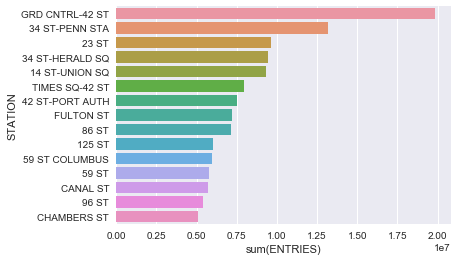

In [25]:
bar1 = sns.barplot(data = df_sum_top, x='ENTRIES',y='STATION',estimator=sum) ##using top stations, creates barplot
plt.setp(bar1.get_xticklabels(), rotation=0);